<h1 align=center><font size = 6> Crop Yield Prediction. </font></h1>

## import required libraries. 

In [1]:
import numpy as np    #Library to handle data in vectorized manner.
import pandas as pd   #library for data analysis.

#Plotting libray matplotlib and associated ploting modules.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


%matplotlib inline
print('All the required libraries are imported.....!')

All the required libraries are imported.....!


## Initial data gathering and cleaning.

### read crop production dataset into pandas dataframe.

In [2]:

df_crop = pd.read_csv("crop_production.csv")

# Now look at the data frame. 
df_crop.head()

,District_name,RICE,WHEAT,JOWARR,BAJRA,MAIZE,RAGI,GRAM,TUR,UDID,MUNG
0,Ahemadnagar,21165,81820,290528,223329,120126,2085,28000,11705,6161,328
1,Akola,0,30569,104344,0,0,0,12632,20821,7377,28576
2,Amravati,4773,15209,0,0,0,0,66270,110996,3134,26431
3,Aurangabad,0,74633,79673,80819,417410,0,28673,28388,667,862
4,Beed,189,50908,119590,103479,6048,0,28066,30039,8738,2538


#### replace blank cells with nan and remove these nan values.

In [3]:
nan_value = float("NaN")
df_crop.replace("", nan_value, inplace=True)
df_crop.dropna(subset = ["District_name"], inplace=True)
print("Drop Sucessfull")
#now look at the shape of our data frame.
print("Size of the data frame is :", df_crop.shape)

Drop Sucessfull
Size of the data frame is : (33, 11)



### Crop production data analysis.

In [4]:
# assign data in new dataframe for analysis.
df_analysis = df_crop


In [5]:
#Set the district name as index - useful for quickly looking up district using .loc method
df_analysis.set_index('District_name' , inplace = True)

#now see how data frame looks.
df_analysis.head()

,RICE,WHEAT,JOWARR,BAJRA,MAIZE,RAGI,GRAM,TUR,UDID,MUNG
District_name,,,,,,,,,,
Ahemadnagar,21165,81820,290528,223329,120126,2085,28000,11705,6161,328
Akola,0,30569,104344,0,0,0,12632,20821,7377,28576
Amravati,4773,15209,0,0,0,0,66270,110996,3134,26431
Aurangabad,0,74633,79673,80819,417410,0,28673,28388,667,862
Beed,189,50908,119590,103479,6048,0,28066,30039,8738,2538


In [6]:
length = len(df_analysis)
length

33

### Lets analyze the crop production data of each district where district name choosed by user.

Please Enter the district name in which you want to analyze crop data in the input field, use the district name from following list.<br>
[Ahemadnagar Akola Amravati Aurangabad Beed Bhandara Buldhana Chandrapur Dhule Gadchiroli Gondia Hingoli Jalgaon Jalna Kolhapur Latur Nagpur Nanded Nandurbar Nashik Osmanabad Parbhani Pune Raigad Ratnagiri Sangli Satara Sindhudurg Solapur Thane Wardha Washim Yavatmal
]<br>

Note : Input field is case sensitive.

Enter the District Name : Satara


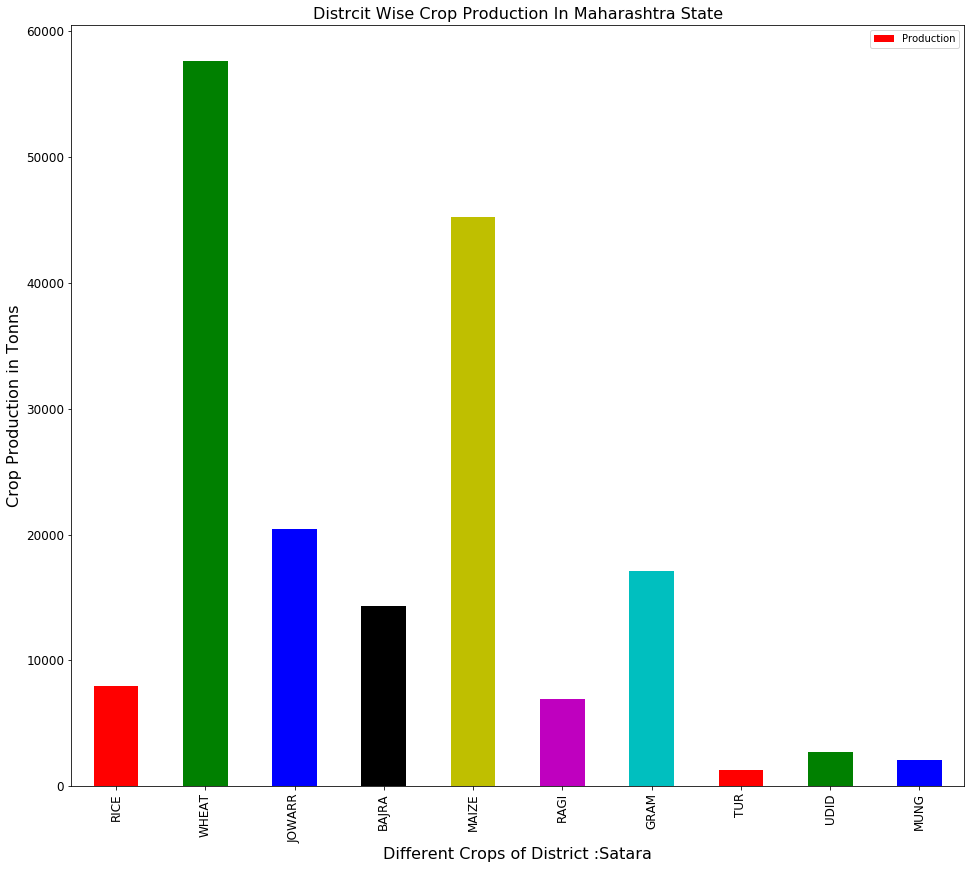

In [9]:
value = input("Enter the District Name :")

df_data = df_analysis.loc[[value]] #assign the data of district which is selected by user input to the new dataframe.

df_data.reset_index(drop=True, inplace=True) # drop the index.
#transpose dataframe.
df_transposed = df_data.T

#rename the column name.
df_transposed.rename(columns={ 0: 'Production'}, inplace=True)

#now lets plot the dtataframe into bar graph.
df_transposed.plot(kind="bar", figsize = (16,14),  fontsize = 12, color = 'rgbkymc')   
plt.title("Distrcit Wise Crop Production In Maharashtra State", fontsize = 16)
plt.xlabel("Different Crops of District :" + value, fontsize = 16)
plt.ylabel("Crop Production in Tonns", fontsize = 16)

plt.savefig('yieldanalysis.png', format= 'png')
plt.show()


